In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

In [5]:
scores = []

model_params = {
    'KNeighborsClassifier':{
        'model' : KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [1,2,3,4,5,6,7,8,9]
        }
    }
}

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })

In [6]:
df = pd.DataFrame(scores, columns = ['model', 'best_score', 'best_params'])

In [7]:
df

,model,best_score,best_params
0,KNeighborsClassifier,0.967171,{'n_neighbors': 2}


Text(42.0, 0.5, 'Truth')

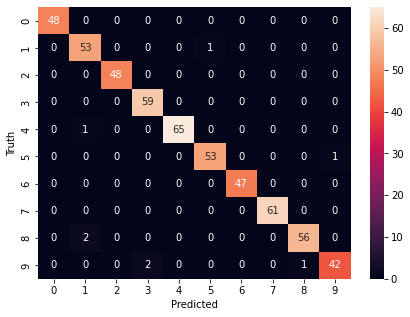

In [8]:
knn = KNeighborsClassifier(n_neighbors=2)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.95      0.98      0.96        54
           2       1.00      1.00      1.00        48
           3       0.97      1.00      0.98        59
           4       1.00      0.98      0.99        66
           5       0.98      0.98      0.98        54
           6       1.00      1.00      1.00        47
           7       1.00      1.00      1.00        61
           8       0.98      0.97      0.97        58
           9       0.98      0.93      0.95        45

    accuracy                           0.99       540
   macro avg       0.99      0.98      0.98       540
weighted avg       0.99      0.99      0.99       540

